<img src="quality_match.png" width="200" height="200" align="right">

## Quality Match Task - Sherif Shawkat

In [1]:
#import libraries
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
#read the references file
references_df = pd.read_json('references.json')
references_df.head()

,img_4686,img_8607,img_5541,img_3218,img_3247,img_1876,img_6228,img_4653,img_5488,img_8591,...,img_3563,img_7393,img_7061,img_6877,img_2192,img_5282,img_0628,img_7736,img_1042,img_2866
is_bicycle,False,True,False,False,True,True,True,False,True,False,...,True,False,False,True,True,True,True,True,False,True


In [3]:
#read the anonymized project file
anonymized_df = pd.read_json('anonymized_project.json')
anonymized_df.head()

,results
root_node,"{'gui_type': 'discrete_answer', 'results': {'7..."


It seems the anonymized_project.json need some cleaning

In [4]:
#re-read the anonymized project file
f = open('anonymized_project.json')
data = json.load(f)

In [5]:
data_refined = data['results']['root_node']
anonymized_df = pd.DataFrame.from_dict(data_refined)
anonymized_df.head()

,gui_type,results
000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,{'results': [{'task_input': {'image_url': 'htt...
000eac10-afe2-4f3f-b4ed-c79b8cfbdcc1,discrete_answer,{'results': [{'task_input': {'image_url': 'htt...
0012d625-0d84-4ae9-973f-21acf84eab54,discrete_answer,{'results': [{'task_input': {'image_url': 'htt...
001460c2-712d-45d2-8afe-cdac237196a2,discrete_answer,{'results': [{'task_input': {'image_url': 'htt...
001873e5-920a-41e5-9a9c-386412b728b6,discrete_answer,{'results': [{'task_input': {'image_url': 'htt...


In [6]:
#create a new dataframe containing the flattened data of anonymized_project.json
anonymized_clean_df = pd.DataFrame(columns=['task_input', 'created_at', 'workpackage_total_size', 'loss',
       'project_node_input_id', 'project_node_output_id', 'task_output',
       'user', 'root_input', 'project_root_node_input_id', 'id', 'gui_type'])

In [7]:
#method to extract data from each row
def func(row):
  global anonymized_clean_df
  results = row.results['results']
  results_df = pd.DataFrame.from_dict(results)
  results_df['id'] = row.name
  results_df['gui_type'] = row.gui_type
  anonymized_clean_df = anonymized_clean_df.append(results_df.reset_index(drop=True))
  anonymized_clean_df.reset_index(drop=True,inplace=True)

In [8]:
#apply the function to anonymized dataframe
anonymized_df.apply(func,axis=1)

000e9703-686d-45c1-9772-9edb38ed2891    None
000eac10-afe2-4f3f-b4ed-c79b8cfbdcc1    None
0012d625-0d84-4ae9-973f-21acf84eab54    None
001460c2-712d-45d2-8afe-cdac237196a2    None
001873e5-920a-41e5-9a9c-386412b728b6    None
                                        ... 
ffd95e77-98fb-4475-b10b-73b352212df5    None
ffdf9ad6-e647-43fe-ac79-2e651a38677b    None
ffefdb0a-6fbf-45f0-8595-1c69a53d0009    None
fff852bc-fdca-43f0-8b51-a225a3be363c    None
fffbb48d-81ce-48fd-b392-77bc6bb765a3    None
Length: 9087, dtype: object

In [9]:
anonymized_clean_df.head()

,task_input,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,task_output,user,root_input,project_root_node_input_id,id,gui_type
0,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T17:42:52.801667+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,0f8b28ab-01fc-43e3-aa87-5e56dc62084c,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '5765cc32-9e3...",{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer
1,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:25:40.088399+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,17e8d2d6-19d2-4a07-8600-a28359541122,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': 'fa6bb2a5-c7e...",{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer
2,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:06:58.986958+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,3a1b14d3-512b-49f2-b08b-c72683f7767c,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '62f1cf90-71c...",{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer
3,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:24:39.596226+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,5a6eea00-7047-47df-8032-aaed5f35222a,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': 'fa6bb2a5-c7e...",{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer
4,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:50:05.183302+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,649d3c65-bb1c-46f4-90ec-36e84774af48,"{'answer': 'no', 'cant_solve': False, 'corrupt...","{'vendor_id': 'vendor_01', 'id': '32971d11-e97...",{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer


In [10]:
#extract data from dictionaries in columns "user" and "task_output" then rename columns
anonymized_clean_df = anonymized_clean_df.join(pd.DataFrame(anonymized_clean_df['user'].tolist())
                                               .rename(columns={"vendor_id": "user_vendor_id", "id": "user_id",
                                                                "vendor_user_id":"user_vendor_user_id"}))
anonymized_clean_df = anonymized_clean_df.join(pd.DataFrame(anonymized_clean_df['task_output'].tolist()).
                                               rename(columns={"answer": "task_output_answer",
                                                               "cant_solve": "task_output_cant_solve",
                                                               "corrupt_data":"task_output_corrupt_data",
                                                               "duration_ms":"task_output_duration_ms"}))
anonymized_clean_df.drop(['user','task_output'], axis = 1, inplace=True)
anonymized_clean_df.head()

,task_input,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,root_input,project_root_node_input_id,id,gui_type,user_vendor_id,user_id,user_vendor_user_id,task_output_answer,task_output_cant_solve,task_output_corrupt_data,task_output_duration_ms
0,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T17:42:52.801667+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,0f8b28ab-01fc-43e3-aa87-5e56dc62084c,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,no,False,False,1423
1,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:25:40.088399+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,17e8d2d6-19d2-4a07-8600-a28359541122,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,no,False,False,1398
2,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:06:58.986958+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,3a1b14d3-512b-49f2-b08b-c72683f7767c,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,no,False,False,1056
3,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:24:39.596226+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,5a6eea00-7047-47df-8032-aaed5f35222a,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,no,False,False,1383
4,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:50:05.183302+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,649d3c65-bb1c-46f4-90ec-36e84774af48,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,32971d11-e972-4d73-99a6-0847e1261995,annotator_18,no,False,False,1678


In [11]:
#extract image name
anonymized_clean_df['image_name'] = anonymized_clean_df['root_input'].apply(lambda x: x.get('image_url')).str[-12:].str.strip('.jpg')

In [12]:
#transpose the references dataframe
references_df = references_df.transpose()
references_df['image_name'] = references_df.index

In [13]:
#merge both dataframes
merged_df = anonymized_clean_df.merge(references_df, on='image_name')
merged_df.head()

,task_input,created_at,workpackage_total_size,loss,project_node_input_id,project_node_output_id,root_input,project_root_node_input_id,id,gui_type,user_vendor_id,user_id,user_vendor_user_id,task_output_answer,task_output_cant_solve,task_output_corrupt_data,task_output_duration_ms,image_name,is_bicycle
0,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T17:42:52.801667+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,0f8b28ab-01fc-43e3-aa87-5e56dc62084c,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,5765cc32-9e32-43e1-bd78-384cfd52d55a,annotator_06,no,False,False,1423,img_0754,False
1,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:25:40.088399+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,17e8d2d6-19d2-4a07-8600-a28359541122,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,no,False,False,1398,img_0754,False
2,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T15:06:58.986958+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,3a1b14d3-512b-49f2-b08b-c72683f7767c,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d,annotator_11,no,False,False,1056,img_0754,False
3,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:24:39.596226+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,5a6eea00-7047-47df-8032-aaed5f35222a,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,annotator_13,no,False,False,1383,img_0754,False
4,{'image_url': 'https://qm-auto-annotator.s3.eu...,2021-02-25T13:50:05.183302+00:00,5,0.0,000e9703-686d-45c1-9772-9edb38ed2891,649d3c65-bb1c-46f4-90ec-36e84774af48,{'image_url': 'https://qm-auto-annotator.s3.eu...,000e9703-686d-45c1-9772-9edb38ed2891,000e9703-686d-45c1-9772-9edb38ed2891,discrete_answer,vendor_01,32971d11-e972-4d73-99a6-0847e1261995,annotator_18,no,False,False,1678,img_0754,False


### Task 1

In [14]:
######################### A ################################

#Number of annotators contributed to the dataset
merged_df['user_id'].nunique()

22

In [15]:
######################## B ##################################

#get the duration statistics
merged_df['task_output_duration_ms'].describe()

count    90870.000000
mean      1284.333873
std       1351.960465
min     -99999.000000
25%        887.000000
50%       1058.000000
75%       1328.000000
max      42398.000000
Name: task_output_duration_ms, dtype: float64

It seems the duration has invalid values, so we remove any negative values

In [16]:
#remove any negative durations, then get the statistics
merged_df = merged_df[merged_df['task_output_duration_ms'] > 0]
merged_df['task_output_duration_ms'].describe()

count    90864.000000
mean      1289.921355
std       1123.999541
min         10.000000
25%        887.000000
50%       1058.000000
75%       1328.000000
max      42398.000000
Name: task_output_duration_ms, dtype: float64

In [17]:
############# C ##################

#group by user ID and count occurrences per user
merged_df.groupby(['user_id']).size().sort_values(ascending=False)

user_id
37a6036c-a9ef-4fcb-b554-7058f00415db    7596
fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54    7078
da2b934c-6384-44ea-adcd-3de648bfae89    6537
62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d    6436
9fddf227-6680-42f5-aca5-533fc439c193    6421
08af8775-a72c-4c59-b60f-9ce7df04fa92    6210
0e606b41-ebe4-4d7d-996c-db910c84971a    6126
75f1e1c8-d127-430f-a885-c2d126364198    6088
5765cc32-9e32-43e1-bd78-384cfd52d55a    5336
32971d11-e972-4d73-99a6-0847e1261995    5170
66d63556-1235-4a5e-accc-651cb2993db4    5061
6d8be901-c6a6-43f8-a5ac-8e44b924bd84    4860
94afdf79-917c-4904-bdaa-7a121f33b0ff    3485
e336139c-5228-42cd-b501-81855532dfa6    3475
70b9b917-b4f2-4ed1-b8f9-f3492f980103    2950
d40ae601-32bf-4b0c-b92c-5bd474e40c18    2175
780c974e-6ce7-4f1d-9afe-56bf96753fca    1745
b04e6596-24c3-4e0b-b96a-4a6d78c04b40    1725
44629999-ab8a-4871-b4d3-4f92c3058161    1280
2d521e66-c47c-4033-ba9e-95dcab974ae5     630
4ceeee9d-1588-4b31-82c6-6744d3d00bab     315
b44e310d-7985-41a0-b764-034b711c75ca     165
dt

In [18]:
############# D ################################


#create a new column "prediction" to compare the user answer with the ground truth
merged_df.loc[((merged_df['is_bicycle']==True) & (merged_df['task_output_answer']=='yes'))
              |((merged_df['is_bicycle']==False) & (merged_df['task_output_answer']=='no'))
              ,'prediction'] = 'correct'


merged_df['prediction'].fillna('wrong',inplace=True)

#for unsolvable tasks, the prediction is "no_answer"
merged_df.loc[merged_df['task_output_cant_solve']==True,"prediction"] = "no_answer"

#create column for image url
merged_df['img_url'] = merged_df['task_input'].apply(lambda x: x.get('image_url'))

In [19]:
#group by the image_url and the user answer, then count the number of yes or no
task_answer_grouped = merged_df.groupby(['img_url','task_output_answer']).size().unstack(fill_value=0)

In [20]:
#get the highly disagreed images among the users
task_answer_grouped['percentage'] = abs(task_answer_grouped['yes']-task_answer_grouped['no'])/10
task_answer_grouped.sort_values(by=['percentage'])

task_output_answer,,no,yes,percentage
img_url,,,,
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_6960.jpg,0,5,5,0.0
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_5469.jpg,0,5,5,0.0
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_6407.jpg,0,5,5,0.0
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_1263.jpg,0,5,5,0.0
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_4461.jpg,0,5,5,0.0
...,...,...,...,...
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_3349.jpg,0,10,0,1.0
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_3348.jpg,0,10,0,1.0
https://qm-auto-annotator.s3.eu-central-1.amazonaws.com/bicycles/img_3347.jpg,0,0,10,1.0


### Task 2

In [21]:
#for any corrupt data, the prediction is "no_answer"
merged_df.loc[merged_df['task_output_corrupt_data']==True,"prediction"] = "no_answer"

In [22]:
#get the percentage of can't solve tasks
merged_df[merged_df.task_output_cant_solve == True].shape[0]/merged_df.shape[0]

0.0001870927980278218

In [23]:
#get the percentage of corrupt data
merged_df[merged_df.task_output_corrupt_data == True].shape[0]/merged_df.shape[0]

3.301637612255679e-05

The "can't solve" occurs with a percentage of 0.018% among the dataframe, while the "corrupt data" occur with a percentage of 0.0033%

In [24]:
#get unsolved tasks per user
merged_df[(merged_df.task_output_corrupt_data == True) | (merged_df.task_output_cant_solve == True)].groupby('user_id').size()

user_id
0e606b41-ebe4-4d7d-996c-db910c84971a    1
32971d11-e972-4d73-99a6-0847e1261995    3
37a6036c-a9ef-4fcb-b554-7058f00415db    2
62f1cf90-71c9-45c5-990c-f9dc0aa6ea3d    1
780c974e-6ce7-4f1d-9afe-56bf96753fca    4
9fddf227-6680-42f5-aca5-533fc439c193    4
b04e6596-24c3-4e0b-b96a-4a6d78c04b40    1
d40ae601-32bf-4b0c-b92c-5bd474e40c18    1
da2b934c-6384-44ea-adcd-3de648bfae89    3
dtype: int64

### Task 3

In [25]:
#group by is_bicycle and count occurrences of each
references_df.groupby('is_bicycle').count().reset_index()

,is_bicycle,image_name
0,False,4501
1,True,4586


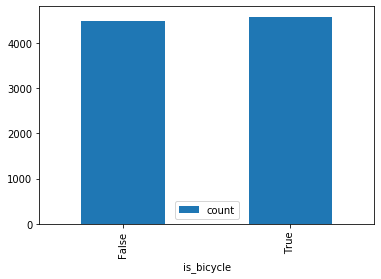

In [26]:
#plot the references values
references_df.groupby('is_bicycle').count().reset_index().plot.bar(x='is_bicycle', y='image_name')
plt.legend(["count"]);

It seems the reference set is balanced

### Task 4

In [27]:
#group by the user_id then prediction
annotators_predictions = merged_df.groupby(['user_id','prediction']).size().unstack(fill_value=0)

#calculate the accuracy for each annotator
annotators_predictions['accuracy'] = annotators_predictions['correct']*100/(
    annotators_predictions['correct']+annotators_predictions['wrong']+annotators_predictions['no_answer'])

#sort the annotators by accuracy descending
annotators_predictions.sort_values(by=['accuracy'], ascending=False)

prediction,correct,no_answer,wrong,accuracy
user_id,,,,
44629999-ab8a-4871-b4d3-4f92c3058161,1214,0,66,94.843750
75f1e1c8-d127-430f-a885-c2d126364198,5774,0,314,94.842313
0e606b41-ebe4-4d7d-996c-db910c84971a,5809,1,316,94.825335
fa6bb2a5-c7ec-4dca-aca3-b0666efa2a54,6702,0,376,94.687765
b04e6596-24c3-4e0b-b96a-4a6d78c04b40,1633,1,91,94.666667
b44e310d-7985-41a0-b764-034b711c75ca,156,0,9,94.545455
66d63556-1235-4a5e-accc-651cb2993db4,4769,0,292,94.230389
780c974e-6ce7-4f1d-9afe-56bf96753fca,1644,4,97,94.212034
94afdf79-917c-4904-bdaa-7a121f33b0ff,3283,0,202,94.203730


The best annotator has an accuracy of 94.8%, the worst annotator has an accuracy of 88.8%

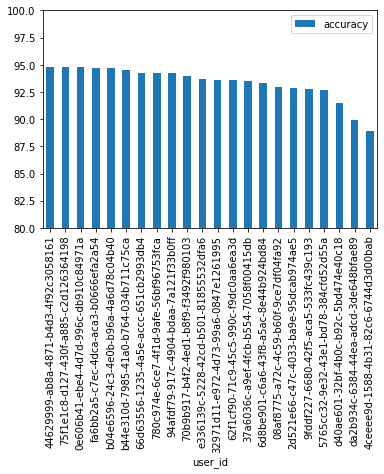

In [28]:
#plot the annotators accuracy sorted descendingly
annotators_predictions.reset_index().sort_values(by=['accuracy'], ascending=False).plot.bar(
    x='user_id', y='accuracy');
plt.ylim(80, 100);